Импортируем библиотеку pandas для работы с данными, при импорте используем сокращенное название `pd`.

In [346]:
import pandas as pd

Читаем `csv` файл, выводим содержимое файла (dataframe) для проверки. В файле разделитель данных - запятые, присутствуют заголовки столбцов, поэтому не указываем доп. параметров при вызове метода `read_csv`.

In [347]:
df = pd.read_csv('player_hist_stats.csv')
df

,Unnamed: 0,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,...,saves,bonus,bps,influence,creativity,threat,ict_index,playerID,first_name,second_name
0,0,2015/16,58822.0,50.0,47.0,86.0,1965.0,0.0,2.0,9.0,...,0.0,7.0,506.0,0.0,0.0,0.0,0.0,1,Cédric,Alves Soares
1,1,2016/17,58822.0,50.0,49.0,102.0,2515.0,0.0,3.0,11.0,...,0.0,11.0,584.0,591.0,648.9,155.0,139.6,1,Cédric,Alves Soares
2,2,2017/18,58822.0,50.0,47.0,85.0,2794.0,0.0,3.0,7.0,...,0.0,2.0,481.0,507.0,455.6,159.0,112.3,1,Cédric,Alves Soares
3,3,2018/19,58822.0,45.0,42.0,52.0,1493.0,1.0,2.0,4.0,...,0.0,7.0,273.0,309.0,226.5,103.0,63.9,1,Cédric,Alves Soares
4,4,2019/20,58822.0,50.0,48.0,61.0,1553.0,1.0,1.0,4.0,...,0.0,3.0,286.0,349.0,218.9,118.0,68.7,1,Cédric,Alves Soares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,2,2019/20,54694.0,110.0,109.0,205.0,3136.0,22.0,5.0,10.0,...,0.0,37.0,807.0,1006.0,479.6,1369.0,285.2,617,Pierre-Emerick,Aubameyang
2147,3,2020/21,54694.0,120.0,113.0,131.0,2330.0,10.0,3.0,10.0,...,0.0,11.0,358.0,493.8,361.5,823.0,167.4,617,Pierre-Emerick,Aubameyang
2148,4,2021/22,54694.0,100.0,96.0,44.0,1036.0,4.0,1.0,6.0,...,0.0,7.0,131.0,217.6,132.4,582.0,92.9,617,Pierre-Emerick,Aubameyang
2149,0,2020/21,245824.0,70.0,69.0,13.0,305.0,1.0,0.0,1.0,...,0.0,0.0,38.0,52.6,26.9,142.0,22.0,618,Carlos Vinícius,Alves Morais


## Введение в статистику. Базовые манипуляции с данными

Выведем года всех сезонов.

In [348]:
df['season_name']

0       2015/16
1       2016/17
2       2017/18
3       2018/19
4       2019/20
         ...   
2146    2019/20
2147    2020/21
2148    2021/22
2149    2020/21
2150    2021/22
Name: season_name, Length: 2151, dtype: object

Выведем уникальные года сезонов.

In [349]:
df['season_name'].unique()

array(['2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21',
       '2021/22', '2014/15', '2012/13', '2013/14', '2011/12', '2008/09',
       '2009/10', '2010/11', '2007/08', '2006/07'], dtype=object)

Информация о записи с индексом 24 (24 строка).

In [350]:
df.iloc[24]

Unnamed: 0                 0
season_name          2016/17
element_code        156074.0
start_cost              45.0
end_cost                41.0
total_points            32.0
minutes                810.0
goals_scored             0.0
assists                  0.0
clean_sheets             4.0
goals_conceded           8.0
own_goals                0.0
penalties_saved          0.0
penalties_missed         0.0
yellow_cards             3.0
red_cards                0.0
saves                    0.0
bonus                    3.0
bps                    171.0
influence              172.0
creativity              49.2
threat                 100.0
ict_index               32.2
playerID                   5
first_name               Rob
second_name          Holding
Name: 24, dtype: object

Количество минут для записи с индексом 24.

In [351]:
df.iloc[24]['minutes']

810.0

Размер датафрейма, в котором записи соответствуют условию: сезон равен 2015/16. Первое значение кортежа - кол-во строк, второе значение - кол-во столбцов.

In [352]:
df[df['season_name'] == '2015/16'].shape

(126, 26)

Размер датафрейма, в котором записи соответствуют условиям:
- сезон не равен 2015/16
- кол-во минут игрока на поле больше 1000

In [353]:
df[~(df['season_name'] == '2015/16') | (df['minutes'] > 1000)].shape

(2102, 26)

Размер датафрейма, строки в котором соответствуют сезону 2015/16 или 2016/17.

In [354]:
df[df['season_name'].isin(['2015/16', '2016/17'])].shape

(270, 26)

Кол-во очков отсортированные по возрастанию.

In [355]:
df['total_points'].sort_values()

1539     -2.0
2150      0.0
788       0.0
795       0.0
219       0.0
        ...  
1711    258.0
1063    259.0
1066    265.0
1239    283.0
1062    303.0
Name: total_points, Length: 2151, dtype: float64

Кол-во очков отсортированные по убыванию.

In [356]:
df['total_points'].sort_values(ascending=False)

1062    303.0
1239    283.0
1066    265.0
1063    259.0
1711    258.0
        ...  
1591      0.0
294       0.0
1576      0.0
2150      0.0
1539     -2.0
Name: total_points, Length: 2151, dtype: float64

Сортировка датафорейма по кол-ву очков и кол-ву минутам на поле.

In [357]:
df.sort_values(by=['total_points', 'minutes'])

,Unnamed: 0,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,...,saves,bonus,bps,influence,creativity,threat,ict_index,playerID,first_name,second_name
1539,1,2009/10,58771.0,45.0,45.0,-2.0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,381,Jack,Colback
21,4,2019/20,153256.0,45.0,42.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,Mohamed,Elneny
40,0,2018/19,198869.0,40.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,Benjamin,White
48,0,2018/19,209289.0,45.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,Emile,Smith Rowe
57,0,2016/17,225321.0,40.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,Aaron,Ramsdale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,6,2021/22,85971.0,100.0,112.0,258.0,3009.0,23.0,10.0,18.0,...,0.0,27.0,819.0,1201.8,1051.5,1296.0,355.4,428,Son,Heung-min
1063,3,2018/19,118748.0,130.0,132.0,259.0,3254.0,22.0,12.0,21.0,...,0.0,18.0,687.0,1186.8,973.9,2168.0,432.7,283,Mohamed,Salah
1066,6,2021/22,118748.0,125.0,131.0,265.0,2758.0,23.0,14.0,17.0,...,0.0,29.0,756.0,1241.0,875.9,2230.0,434.8,283,Mohamed,Salah
1239,1,2007/08,14937.0,120.0,137.0,283.0,2746.0,31.0,7.0,0.0,...,0.0,35.0,0.0,0.0,0.0,0.0,0.0,326,Cristiano Ronaldo,dos Santos Aveiro


## Типы данных. Создание новых переменных

Создаем новую переменную - общее кол-во голов и ассистов игрока за сезон.

In [358]:
df['goals_and_assists'] = df['goals_scored'] + df['assists']
df

,Unnamed: 0,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,...,bonus,bps,influence,creativity,threat,ict_index,playerID,first_name,second_name,goals_and_assists
0,0,2015/16,58822.0,50.0,47.0,86.0,1965.0,0.0,2.0,9.0,...,7.0,506.0,0.0,0.0,0.0,0.0,1,Cédric,Alves Soares,2.0
1,1,2016/17,58822.0,50.0,49.0,102.0,2515.0,0.0,3.0,11.0,...,11.0,584.0,591.0,648.9,155.0,139.6,1,Cédric,Alves Soares,3.0
2,2,2017/18,58822.0,50.0,47.0,85.0,2794.0,0.0,3.0,7.0,...,2.0,481.0,507.0,455.6,159.0,112.3,1,Cédric,Alves Soares,3.0
3,3,2018/19,58822.0,45.0,42.0,52.0,1493.0,1.0,2.0,4.0,...,7.0,273.0,309.0,226.5,103.0,63.9,1,Cédric,Alves Soares,3.0
4,4,2019/20,58822.0,50.0,48.0,61.0,1553.0,1.0,1.0,4.0,...,3.0,286.0,349.0,218.9,118.0,68.7,1,Cédric,Alves Soares,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,2,2019/20,54694.0,110.0,109.0,205.0,3136.0,22.0,5.0,10.0,...,37.0,807.0,1006.0,479.6,1369.0,285.2,617,Pierre-Emerick,Aubameyang,27.0
2147,3,2020/21,54694.0,120.0,113.0,131.0,2330.0,10.0,3.0,10.0,...,11.0,358.0,493.8,361.5,823.0,167.4,617,Pierre-Emerick,Aubameyang,13.0
2148,4,2021/22,54694.0,100.0,96.0,44.0,1036.0,4.0,1.0,6.0,...,7.0,131.0,217.6,132.4,582.0,92.9,617,Pierre-Emerick,Aubameyang,5.0
2149,0,2020/21,245824.0,70.0,69.0,13.0,305.0,1.0,0.0,1.0,...,0.0,38.0,52.6,26.9,142.0,22.0,618,Carlos Vinícius,Alves Morais,1.0


Напишем функцию, которая будет определять конечную стоимость игроков за сезон по трем условным категориям: низкая, высокая, средняя. Если значение не попадет в диапазоны - вернется None.

In [359]:
def get_cost_category(cost):
    if cost < 50:
        return 'low'
    elif cost < 100:
        return 'medium'
    elif cost < 120:
        return 'hight'

Добавим колонку в датафрейм с применением написанной функции.

In [360]:
df['end_cost_category'] = df['end_cost'].apply(get_cost_category)
df

,Unnamed: 0,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,...,bps,influence,creativity,threat,ict_index,playerID,first_name,second_name,goals_and_assists,end_cost_category
0,0,2015/16,58822.0,50.0,47.0,86.0,1965.0,0.0,2.0,9.0,...,506.0,0.0,0.0,0.0,0.0,1,Cédric,Alves Soares,2.0,low
1,1,2016/17,58822.0,50.0,49.0,102.0,2515.0,0.0,3.0,11.0,...,584.0,591.0,648.9,155.0,139.6,1,Cédric,Alves Soares,3.0,low
2,2,2017/18,58822.0,50.0,47.0,85.0,2794.0,0.0,3.0,7.0,...,481.0,507.0,455.6,159.0,112.3,1,Cédric,Alves Soares,3.0,low
3,3,2018/19,58822.0,45.0,42.0,52.0,1493.0,1.0,2.0,4.0,...,273.0,309.0,226.5,103.0,63.9,1,Cédric,Alves Soares,3.0,low
4,4,2019/20,58822.0,50.0,48.0,61.0,1553.0,1.0,1.0,4.0,...,286.0,349.0,218.9,118.0,68.7,1,Cédric,Alves Soares,2.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,2,2019/20,54694.0,110.0,109.0,205.0,3136.0,22.0,5.0,10.0,...,807.0,1006.0,479.6,1369.0,285.2,617,Pierre-Emerick,Aubameyang,27.0,hight
2147,3,2020/21,54694.0,120.0,113.0,131.0,2330.0,10.0,3.0,10.0,...,358.0,493.8,361.5,823.0,167.4,617,Pierre-Emerick,Aubameyang,13.0,hight
2148,4,2021/22,54694.0,100.0,96.0,44.0,1036.0,4.0,1.0,6.0,...,131.0,217.6,132.4,582.0,92.9,617,Pierre-Emerick,Aubameyang,5.0,medium
2149,0,2020/21,245824.0,70.0,69.0,13.0,305.0,1.0,0.0,1.0,...,38.0,52.6,26.9,142.0,22.0,618,Carlos Vinícius,Alves Morais,1.0,medium


Приведем переменную к типу категориальной, выведем информацию о датафрейме, увидим, что переменная имеет тип `category`. 

In [361]:
df['end_cost_category'] = pd.Categorical(df['end_cost_category'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         2151 non-null   int64   
 1   season_name        2151 non-null   object  
 2   element_code       2151 non-null   float64 
 3   start_cost         2151 non-null   float64 
 4   end_cost           2151 non-null   float64 
 5   total_points       2151 non-null   float64 
 6   minutes            2151 non-null   float64 
 7   goals_scored       2151 non-null   float64 
 8   assists            2151 non-null   float64 
 9   clean_sheets       2151 non-null   float64 
 10  goals_conceded     2151 non-null   float64 
 11  own_goals          2151 non-null   float64 
 12  penalties_saved    2151 non-null   float64 
 13  penalties_missed   2151 non-null   float64 
 14  yellow_cards       2151 non-null   float64 
 15  red_cards          2151 non-null   float64 
 16  saves 

Сделаем тоже самое для начальной стоимости игрока с применением лямбда функции.

In [362]:
df['start_cost_category'] = pd.Categorical(df['start_cost'].apply(lambda x: 'low' if x < 75 else 'hight'))
df['start_cost_category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2151 entries, 0 to 2150
Series name: start_cost_category
Non-Null Count  Dtype   
--------------  -----   
2151 non-null   category
dtypes: category(1)
memory usage: 2.3 KB


In [363]:
df

,Unnamed: 0,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,...,influence,creativity,threat,ict_index,playerID,first_name,second_name,goals_and_assists,end_cost_category,start_cost_category
0,0,2015/16,58822.0,50.0,47.0,86.0,1965.0,0.0,2.0,9.0,...,0.0,0.0,0.0,0.0,1,Cédric,Alves Soares,2.0,low,low
1,1,2016/17,58822.0,50.0,49.0,102.0,2515.0,0.0,3.0,11.0,...,591.0,648.9,155.0,139.6,1,Cédric,Alves Soares,3.0,low,low
2,2,2017/18,58822.0,50.0,47.0,85.0,2794.0,0.0,3.0,7.0,...,507.0,455.6,159.0,112.3,1,Cédric,Alves Soares,3.0,low,low
3,3,2018/19,58822.0,45.0,42.0,52.0,1493.0,1.0,2.0,4.0,...,309.0,226.5,103.0,63.9,1,Cédric,Alves Soares,3.0,low,low
4,4,2019/20,58822.0,50.0,48.0,61.0,1553.0,1.0,1.0,4.0,...,349.0,218.9,118.0,68.7,1,Cédric,Alves Soares,2.0,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,2,2019/20,54694.0,110.0,109.0,205.0,3136.0,22.0,5.0,10.0,...,1006.0,479.6,1369.0,285.2,617,Pierre-Emerick,Aubameyang,27.0,hight,hight
2147,3,2020/21,54694.0,120.0,113.0,131.0,2330.0,10.0,3.0,10.0,...,493.8,361.5,823.0,167.4,617,Pierre-Emerick,Aubameyang,13.0,hight,hight
2148,4,2021/22,54694.0,100.0,96.0,44.0,1036.0,4.0,1.0,6.0,...,217.6,132.4,582.0,92.9,617,Pierre-Emerick,Aubameyang,5.0,medium,hight
2149,0,2020/21,245824.0,70.0,69.0,13.0,305.0,1.0,0.0,1.0,...,52.6,26.9,142.0,22.0,618,Carlos Vinícius,Alves Morais,1.0,medium,low


C помощью библиотеки `numpy` создадим колонку с бинарными данными "к рассмотрению к покупке". В качестве условий используем ранее созданные данные.

In [364]:
import numpy as np

df['is_consider_for_purchase'] = np.where(
    (df['end_cost_category'] == 'medium') &
    (df['goals_and_assists'] > 15),
    True, False
)
df

,Unnamed: 0,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,...,creativity,threat,ict_index,playerID,first_name,second_name,goals_and_assists,end_cost_category,start_cost_category,is_consider_for_purchase
0,0,2015/16,58822.0,50.0,47.0,86.0,1965.0,0.0,2.0,9.0,...,0.0,0.0,0.0,1,Cédric,Alves Soares,2.0,low,low,False
1,1,2016/17,58822.0,50.0,49.0,102.0,2515.0,0.0,3.0,11.0,...,648.9,155.0,139.6,1,Cédric,Alves Soares,3.0,low,low,False
2,2,2017/18,58822.0,50.0,47.0,85.0,2794.0,0.0,3.0,7.0,...,455.6,159.0,112.3,1,Cédric,Alves Soares,3.0,low,low,False
3,3,2018/19,58822.0,45.0,42.0,52.0,1493.0,1.0,2.0,4.0,...,226.5,103.0,63.9,1,Cédric,Alves Soares,3.0,low,low,False
4,4,2019/20,58822.0,50.0,48.0,61.0,1553.0,1.0,1.0,4.0,...,218.9,118.0,68.7,1,Cédric,Alves Soares,2.0,low,low,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,2,2019/20,54694.0,110.0,109.0,205.0,3136.0,22.0,5.0,10.0,...,479.6,1369.0,285.2,617,Pierre-Emerick,Aubameyang,27.0,hight,hight,False
2147,3,2020/21,54694.0,120.0,113.0,131.0,2330.0,10.0,3.0,10.0,...,361.5,823.0,167.4,617,Pierre-Emerick,Aubameyang,13.0,hight,hight,False
2148,4,2021/22,54694.0,100.0,96.0,44.0,1036.0,4.0,1.0,6.0,...,132.4,582.0,92.9,617,Pierre-Emerick,Aubameyang,5.0,medium,hight,False
2149,0,2020/21,245824.0,70.0,69.0,13.0,305.0,1.0,0.0,1.0,...,26.9,142.0,22.0,618,Carlos Vinícius,Alves Morais,1.0,medium,low,False


Выведем данные, где игроки могут быть рассмотрены к покупке.

In [365]:
df[df['is_consider_for_purchase'] == True]

,Unnamed: 0,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,...,creativity,threat,ict_index,playerID,first_name,second_name,goals_and_assists,end_cost_category,start_cost_category,is_consider_for_purchase
55,3,2021/22,223340.0,65.0,67.0,179.0,2978.0,11.0,9.0,13.0,...,977.8,1434.0,320.0,13,Bukayo,Saka,20.0,medium,low,True
93,3,2019/20,205651.0,95.0,99.0,146.0,2018.0,14.0,8.0,12.0,...,447.7,1620.0,282.1,28,Gabriel,Fernando de Jesus,22.0,medium,hight,True
95,5,2021/22,205651.0,85.0,86.0,120.0,1871.0,8.0,8.0,11.0,...,530.9,1126.0,222.3,28,Gabriel,Fernando de Jesus,16.0,medium,hight,True
100,4,2016/17,84583.0,80.0,87.0,171.0,2228.0,13.0,8.0,8.0,...,1081.8,1125.0,306.5,29,Philippe,Coutinho Correia,21.0,medium,hight,True
108,5,2019/20,84939.0,60.0,76.0,198.0,2800.0,22.0,2.0,6.0,...,458.3,1558.0,302.4,30,Danny,Ings,24.0,medium,low,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,3,2009/10,18892.0,85.0,84.0,152.0,3300.0,5.0,11.0,0.0,...,0.0,0.0,0.0,538,Ashley,Young,16.0,medium,hight,True
2050,4,2010/11,18892.0,85.0,84.0,160.0,3050.0,7.0,11.0,7.0,...,0.0,0.0,0.0,538,Ashley,Young,18.0,medium,hight,True
2051,5,2011/12,18892.0,100.0,96.0,123.0,1565.0,6.0,11.0,9.0,...,0.0,0.0,0.0,538,Ashley,Young,17.0,medium,hight,True
2119,0,2021/22,230251.0,50.0,58.0,134.0,2579.0,10.0,7.0,3.0,...,453.4,932.0,205.2,585,Emmanuel,Dennis,17.0,medium,low,True


Сохраним получившийся датафрейм в новый `csv` файл. Укажем доп. аргумент ```index=False```, для того, чтобы не сохранилась доп. индексная колонка.

In [366]:
df.to_csv('player_hist_stats_copy.csv')

Сохраним в `xlsx`.

In [367]:
df.to_excel('player_hist_stats_copy.xlsx', index=False)

## Генеральная совокупность и выборка. Частотные таблицы и распределения

Выведем, сколько раз каждое значение из категориальной переменной `end_cost_category` встречается в данных.

In [368]:
df['end_cost_category'].value_counts()

low       1151
medium     964
hight       23
Name: end_cost_category, dtype: int64

Используем параметр ```dropna=False``` - увидим, сколько значений не попадают ни в одну категорию.

In [369]:
df['end_cost_category'].value_counts(dropna=False)

low       1151
medium     964
hight       23
NaN         13
Name: end_cost_category, dtype: int64

Выведем общее кол-во голов игроков за все сезоны и отсортируем по возрастанию. Для этого сгруппируем по имени и фамилии игрока.

In [370]:
df.groupby(['second_name', 'first_name'])['goals_scored'].sum().sort_values()

second_name  first_name
Šarkić       Matija          0.0
Hennessey    Wayne           0.0
Hjelde       Leo Fuhr        0.0
Iroegbunam   Tim             0.0
Jensen       Mathias         0.0
                           ...  
Heung-min    Son            93.0
Sterling     Raheem        109.0
Salah        Mohamed       120.0
Vardy        Jamie         133.0
Kane         Harry         182.0
Name: goals_scored, Length: 495, dtype: float64

Выведем гистограмму конечной стоимости игроков.

<AxesSubplot: >

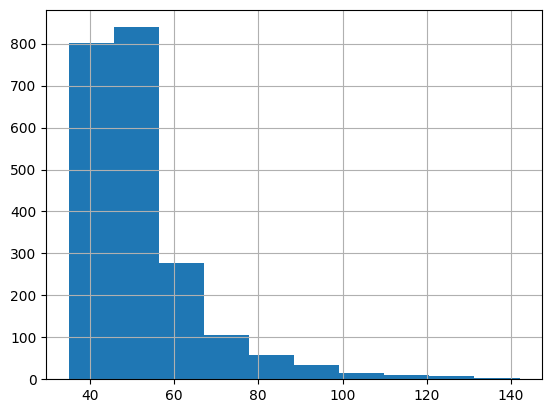

In [371]:
df['end_cost'].hist()

Для того, чтобы более детально рассмотреть гистограмму, зададим параметр ```bins=40```

<AxesSubplot: >

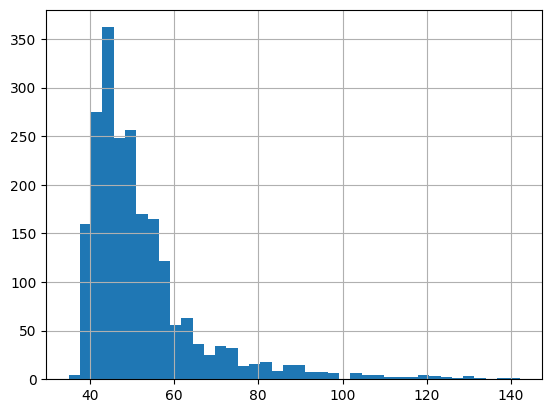

In [372]:
df['end_cost'].hist(bins=40)

Построим столбчатый график типа бар для категориальной переменной `end_cost_category`.
Из графика видно, что наибольшее кол-во игроков попадают в категорию `low` - игроков с низкой стоимостью.

<AxesSubplot: >

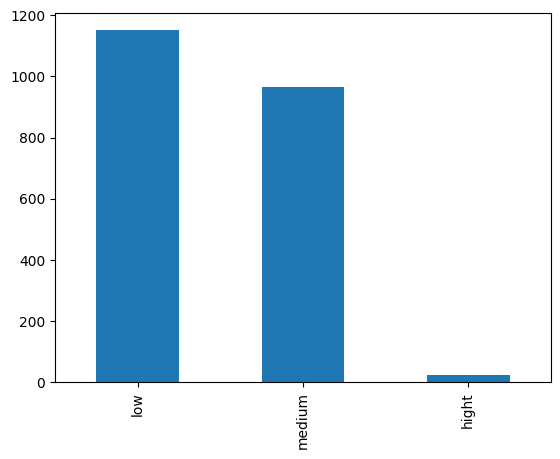

In [373]:
df['end_cost_category'].value_counts().plot(kind='bar')

Рассмотрим, как общее количество пасов и голов за сезон влияют на категорию игрока по конечной стоимости. Видно, что чем больше количество, тем большее кол-во игроков находятся в верхних категориях стоимости.

In [374]:
df.groupby('goals_and_assists')['end_cost_category'].value_counts().unstack()

end_cost_category,hight,low,medium
goals_and_assists,,,
0.0,0,610,159
1.0,0,170,82
2.0,0,146,67
3.0,0,78,57
4.0,0,53,66
5.0,0,32,71
6.0,0,14,59
7.0,0,24,46
8.0,0,8,54


Построим график.

<AxesSubplot: xlabel='goals_and_assists'>

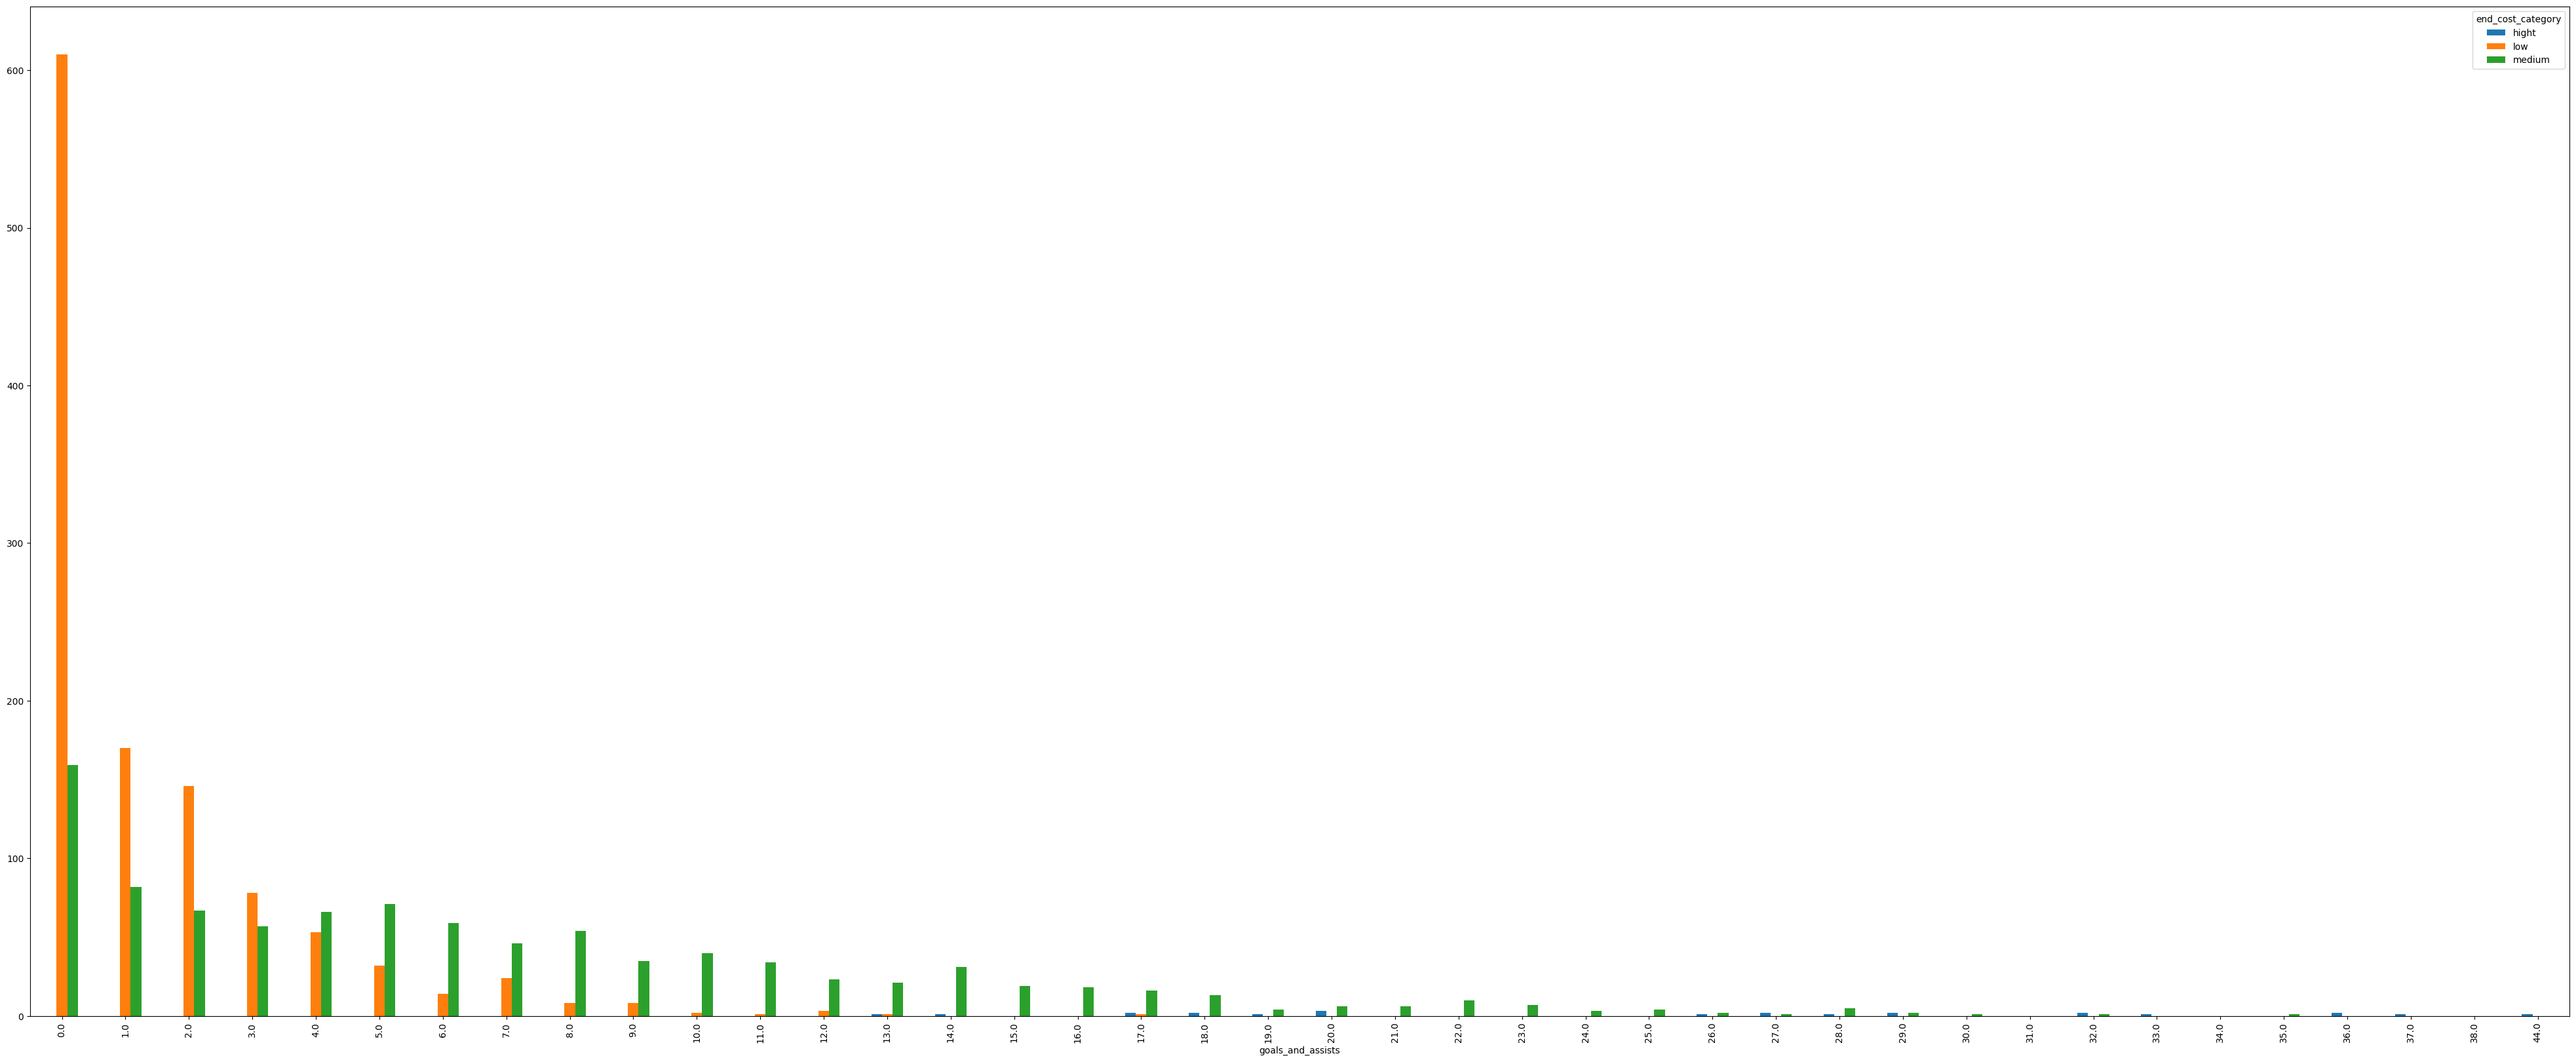

In [375]:
df.groupby('goals_and_assists')['end_cost_category'].value_counts().unstack().plot(kind='bar', figsize=(50,20))

## Описательные статистики: меры центральной тенденции и разброса

Найдем среднее кол-во голов за сезон для каждого футболиста с помощью метода ```mean()```. Для наглядности отсортируем по возрастанию.

In [376]:
df.groupby(['second_name', 'first_name'])['goals_scored'].mean().sort_values()

second_name              first_name       
Šarkić                   Matija                0.000000
Heaton                   Tom                   0.000000
Thompson                 Dominic               0.000000
Henderson                Dean                  0.000000
Silveira Neves Vojnovic  Lyanco                0.000000
                                                ...    
Aubameyang               Pierre-Emerick       13.600000
Kane                     Harry                16.545455
Vardy                    Jamie                16.625000
Salah                    Mohamed              17.142857
dos Santos Aveiro        Cristiano Ronaldo    21.000000
Name: goals_scored, Length: 495, dtype: float64

Найдем медианное значение кол-ва голов за сезон для каждого футболиста с помощью метода ```median()```. 

In [377]:
df.groupby(['second_name', 'first_name'])['goals_scored'].median().sort_values()

second_name        first_name       
Šarkić             Matija                0.0
Solanke            Dominic               0.0
Soumaré            Boubakary             0.0
Holgate            Mason                 0.0
Holding            Rob                   0.0
                                        ... 
Watkins            Ollie                12.5
Vardy              Jamie                16.5
Kane               Harry                18.0
dos Santos Aveiro  Cristiano Ronaldo    18.0
Salah              Mohamed              22.0
Name: goals_scored, Length: 495, dtype: float64

Получим информацию о том, в какую ценовую категорию попадал футболист по итогам сезона по каждому сезону.

In [378]:
df.groupby(['second_name', 'first_name', 'season_name'])['end_cost_category'].agg(lambda x: x.value_counts().index[0]).sort_values()

second_name        first_name         season_name
De Bruyne          Kevin              2021/22         hight
dos Santos Aveiro  Cristiano Ronaldo  2007/08         hight
                                      2006/07         hight
Kane               Harry              2021/22         hight
                                      2020/21         hight
                                                      ...  
                                      2014/15        medium
                                      2011/12        medium
Jones              Phil               2018/19        medium
Knockaert          Anthony            2019/20        medium
Kouyaté            Cheikhou           2015/16        medium
Name: end_cost_category, Length: 2149, dtype: object

Постороим агрегирующую таблицу

In [379]:
df.pivot_table(index='goals_scored',
    values=['first_name', 'second_name'],
    aggfunc=['mean', 'median'])

/var/folders/m5/bdgqyz4j23vf9_x9xhjb_mvh0000gn/T/ipykernel_52125/3079184665.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.pivot_table(index='goals_scored',
/var/folders/m5/bdgqyz4j23vf9_x9xhjb_mvh0000gn/T/ipykernel_52125/3079184665.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.pivot_table(index='goals_scored',


goals_scored
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


## Z-оценка. Выбросы

Импортируем статистическую библиотеку `scipy`.

In [380]:
import scipy.stats

Вручную рассчитаем z-оценку для игрока с наибольшим кол-вом голов за сезон. Для этого отсортируем значения, возьмем последний элемент. Высчитаем среднее всех забитых голов, высчитаем среднеквадратичное отклонение для выборки, рассчитаем по формуле.

In [381]:
X = df['goals_scored'].sort_values().iloc[-1]
M = df['goals_scored'].mean()  # среднее всех забитых голов 
sigma = df['goals_scored'].std(ddof=0)  # среднеквадратичное отклонение 
z_score = (X - M) / sigma
print('z-оценка =', z_score)

z-оценка = 7.801963314683599


Теперь рассчитаем z-оценку для всех данных с помощью библиотеки. Как видим, последнее значение совпадает со значением, рассчитанным вручную - рассчитано верно. Можем наблюдать кол-во среднеквадратичных отклонений кол-ва голов за сезон для каждого игрока. Чем больше игрок забил - тем выше отклонение.

In [382]:
scipy.stats.zscore(df['goals_scored'].sort_values())

0      -0.563820
1247   -0.563820
1246   -0.563820
1245   -0.563820
1244   -0.563820
          ...   
1698    5.971948
1699    7.017671
1700    7.017671
1239    7.540533
1062    7.801963
Name: goals_scored, Length: 2151, dtype: float64

Добавим z-оценку в датафрейм.

In [383]:
df['z_score'] = scipy.stats.zscore(df['goals_scored'].sort_values())

Посмотрим, как условная категория стоимости игроков по окончанию сезона влияет на z-оценку. Как видим, игроки, попадающие в высокую категорию, заработали большее кол-во очков за сезон. 

In [384]:
df.groupby('end_cost_category')['z_score'].mean()

end_cost_category
hight     3.584972
low      -0.409369
medium    0.338170
Name: z_score, dtype: float64

In [385]:
q1 = df['end_cost'].quantile(0.25)
q3 = df['end_cost'].quantile(0.75)
iqr = q3 - q1
print(iqr)

12.0


In [386]:
df['end_cost'].describe()

count    2151.000000
mean       52.677824
std        13.830161
min        35.000000
25%        44.000000
50%        49.000000
75%        56.000000
max       142.000000
Name: end_cost, dtype: float64

Найдем интерквартильный размах, рассматривать будем конечную стоимость игроков по итогу сезона. 

In [387]:
q3 = np.percentile(df['end_cost'], 75)
q1 = np.percentile(df['end_cost'], 25)
print(q3, q1)
iqr = q3 - q1
print(iqr)

56.0 44.0
12.0


Найдем границу сверху и границу снизу, каким образом будут определяться выбросы. Все, что выходит за интервалы ниже, будет считаться выбросами. Выведем границы на экран.

In [388]:
iqr_thr_bottom = q1 - 1.5 * iqr
iqr_thr_top = q1 + 1.5 * iqr
print(iqr_thr_bottom, iqr_thr_top)

26.0 62.0


Посмотрим кол-во выбросов согласно найденному распределению.

In [389]:
df[df['end_cost'] > iqr_thr_top].shape

(307, 31)

Можем рассмотреть, на какие сезоны приходится большее кол-во выбросов. Видно, что наибольшее их кол-во приходится на последние сезоны.

In [390]:
df[df['end_cost'] > iqr_thr_top]['season_name'].value_counts()

2021/22    60
2020/21    47
2018/19    41
2019/20    37
2017/18    31
2016/17    24
2015/16    19
2013/14    11
2014/15    11
2012/13     6
2011/12     6
2009/10     3
2010/11     3
2007/08     3
2008/09     3
2006/07     2
Name: season_name, dtype: int64

Ради интереса можем рассмотреть, на каких игроков приходились выбросы в сезоне 2006/07.

In [391]:
df[(df['end_cost'] > iqr_thr_top) & (df['season_name'] == '2006/07')]

,Unnamed: 0,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,...,threat,ict_index,playerID,first_name,second_name,goals_and_assists,end_cost_category,start_cost_category,is_consider_for_purchase,z_score
1238,0,2006/07,14937.0,100.0,122.0,244.0,2783.0,17.0,16.0,0.0,...,0.0,0.0,326,Cristiano Ronaldo,dos Santos Aveiro,33.0,NaN,hight,False,3.880502
1557,0,2006/07,20467.0,85.0,83.0,36.0,646.0,0.0,3.0,0.0,...,0.0,0.0,400,Theo,Walcott,3.0,medium,hight,False,-0.563820


Теперь найдем выбросы через среднеквадратичное отклонение.

In [392]:
mean = df['end_cost'].mean()
std = df['end_cost'].std()
std_outlier_threshold_bottom = mean - 2.5 * std
std_outlier_threshold_up = mean + 2.5 * std
print(std_outlier_threshold_bottom)
print(std_outlier_threshold_up)

18.10242081549724
87.25322772006761


In [393]:
df[df['end_cost'] > std_outlier_threshold_up].shape 

(73, 31)

## Корреляция

Рассчитаем общее количество желтых карточек за все сезоны, а также среднее количество проведенных им минут на поле. Посмотрим, коррелируют ли значения.

In [394]:
yellow_cards_sum = df.groupby(['first_name', 'second_name'])['yellow_cards'].sum()
minutes_mean = df.groupby(['first_name', 'second_name'])['minutes'].mean()

Соединим полученные значения по колонкам.

In [395]:
yellow_cards_minutes = pd.concat([minutes_mean, yellow_cards_sum], axis=1)

Для начала возьмем первых пять записей, рассчитаем коэффициент корреляции вручную.

In [396]:
first_five = yellow_cards_minutes.iloc[:5]

Найдем отклонение для переменных.

In [397]:
first_five['X - Mx'] = first_five['minutes'] - first_five['minutes'].mean()
first_five['Y - My'] = first_five['yellow_cards'] - first_five['yellow_cards'].mean()

/var/folders/m5/bdgqyz4j23vf9_x9xhjb_mvh0000gn/T/ipykernel_52125/1764958808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five['X - Mx'] = first_five['minutes'] - first_five['minutes'].mean()
/var/folders/m5/bdgqyz4j23vf9_x9xhjb_mvh0000gn/T/ipykernel_52125/1764958808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five['Y - My'] = first_five['yellow_cards'] - first_five['yellow_cards'].mean()


Выводим результат.

In [398]:
first_five

minutes  yellow_cards       X - Mx  Y - My
first_name second_name                                                
Aaron      Cresswell    2766.125000          29.0   819.266667    10.4
           Ramsdale     1962.000000           2.0    15.141667   -16.6
           Wan-Bissaka  1947.333333          18.0     0.475000    -0.6
Abdoulaye  Doucouré     2645.333333          42.0   698.475000    23.4
Adam       Armstrong     413.500000           2.0 -1533.358333   -16.6

Найдем сумму квадратов для X, сумму квадратов для Y, сумму произведений.

In [399]:
SSx = (first_five['X - Mx']**2).sum()
SSy = (first_five['Y - My']**2).sum()
SP = (first_five['X - Mx']*first_five['Y - My']).sum()
print(SSx, SSy, SP)

3510482.470833333 1207.2 50066.8


Рассчитываем коэффициент корреляции.

In [400]:
r = SP / np.sqrt(SSx*SSy)
print(r)

0.7690893841181473


Проверим расчеты, сравним с результатами работы функции библиотеки. Значение такое же - расчет выполнен верно.

In [401]:
first_five['minutes'].corr(first_five['yellow_cards'])

0.7690893841181472

Для наглядности отобразим график.

<AxesSubplot: xlabel='minutes', ylabel='yellow_cards'>

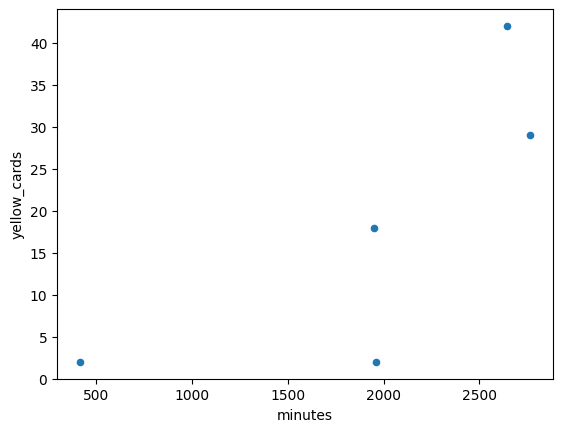

In [402]:
first_five.plot('minutes', 'yellow_cards', kind='scatter')

Найдем коэффициент корреляции для всех данных. Значение находится в диапазоне от 0.5 до 0.7, по классификации Чеддока определяется как заметная. График, построенный выше, это наглядно демонстрирует. Значение положительное, что свидетельствует о прямой зависимости кол-ва проведенных минут игроком на поле и кол-ву полученных желтых карточек.

In [403]:
df['minutes'].corr(df['yellow_cards'])

0.6183387790812421

## Визуализация данных

Импортируем библиотеку для построения графиков.

In [404]:
import matplotlib.pyplot as plt

Построим столбчатую диаграмму. Агрегируем данные по сезону и посчитаем среднее количество забитых голов.

In [405]:
season_goals = df.groupby(df['season_name'])['goals_scored'].mean()
season_goals

season_name
2006/07    3.125000
2007/08    3.461538
2008/09    1.700000
2009/10    0.730769
2010/11    1.400000
2011/12    1.162162
2012/13    1.207547
2013/14    1.636364
2014/15    1.804348
2015/16    2.555556
2016/17    2.388889
2017/18    2.440860
2018/19    2.454167
2019/20    2.312081
2020/21    2.113821
2021/22    2.065463
Name: goals_scored, dtype: float64

Построим график. Отобразим столбцы зеленым цветом, выберем размер графика, чтобы поместилась вся информация.

<BarContainer object of 16 artists>

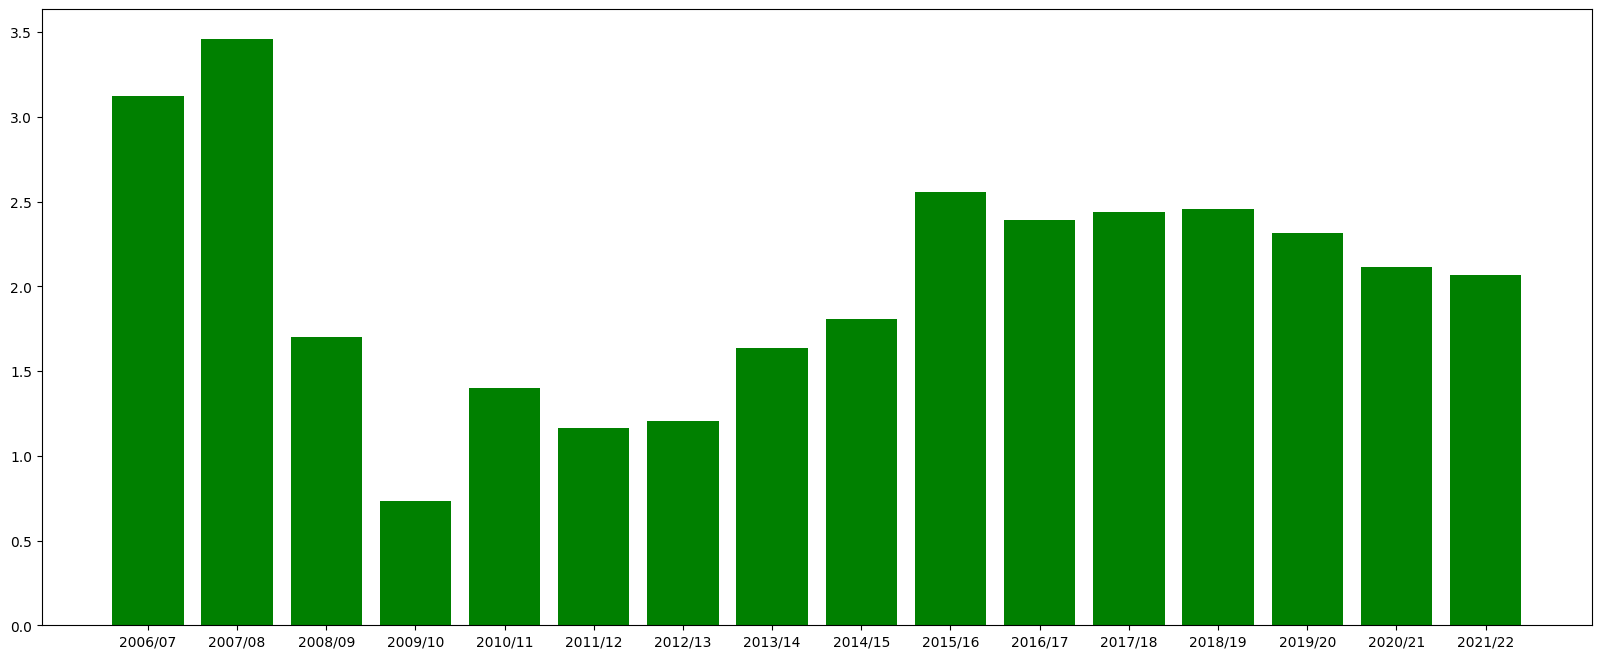

In [406]:
plt.figure(figsize=(20, 8))
plt.bar(season_goals.index, season_goals, color='green')

Построим линейный график на тех же данных.

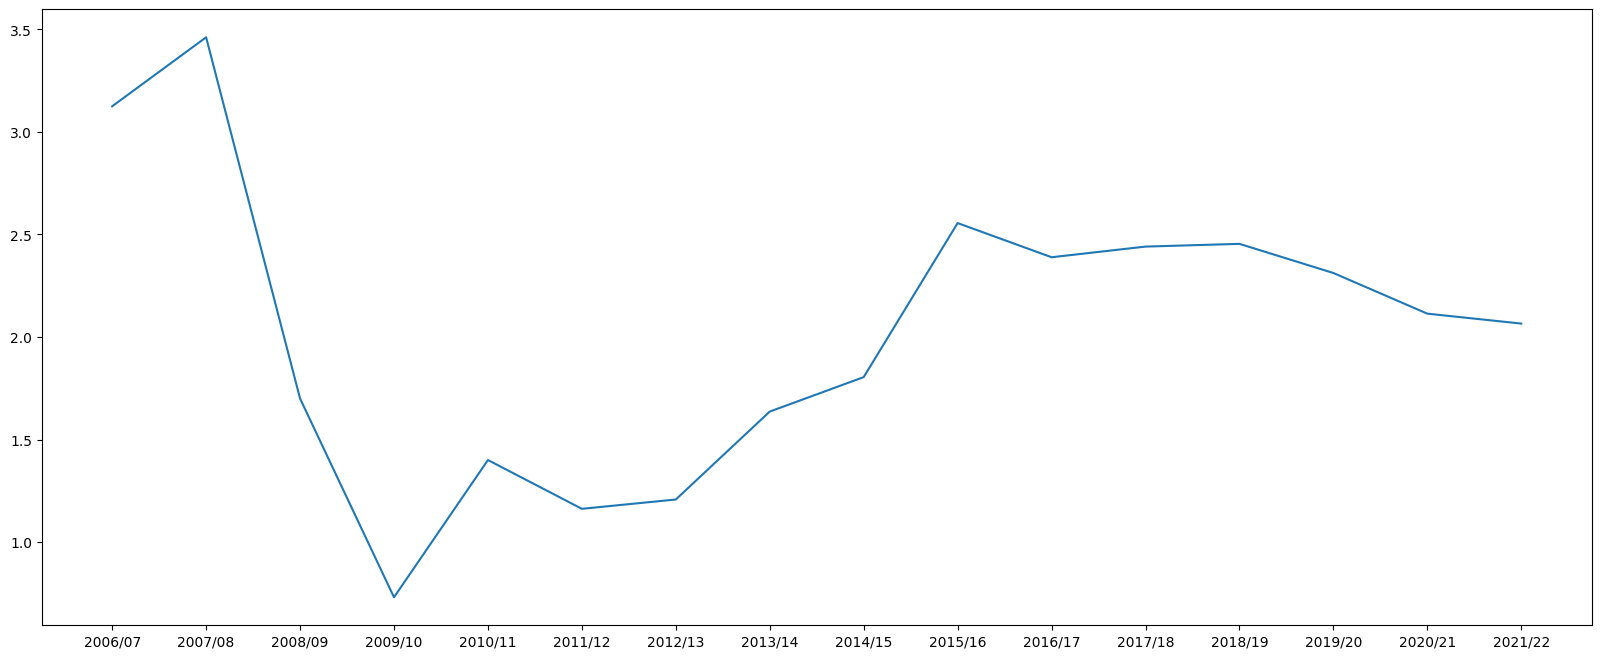

In [407]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(season_goals)

Агрегируем данные, получим информацию о забитых мячах для каждого игрока по каждому из сезона.

In [408]:
players = df.groupby(['second_name', 'season_name'])['goals_scored'].sum()
players

second_name  season_name
Adams        2019/20        4.0
             2020/21        9.0
             2021/22        7.0
Adarabioyo   2016/17        0.0
             2017/18        0.0
                           ... 
van de Beek  2020/21        1.0
             2021/22        2.0
Ødegaard     2020/21        1.0
             2021/22        7.0
Šarkić       2020/21        0.0
Name: goals_scored, Length: 2095, dtype: float64

Построим график для игроков Salah и Borges Fernandes, добавим легенду.

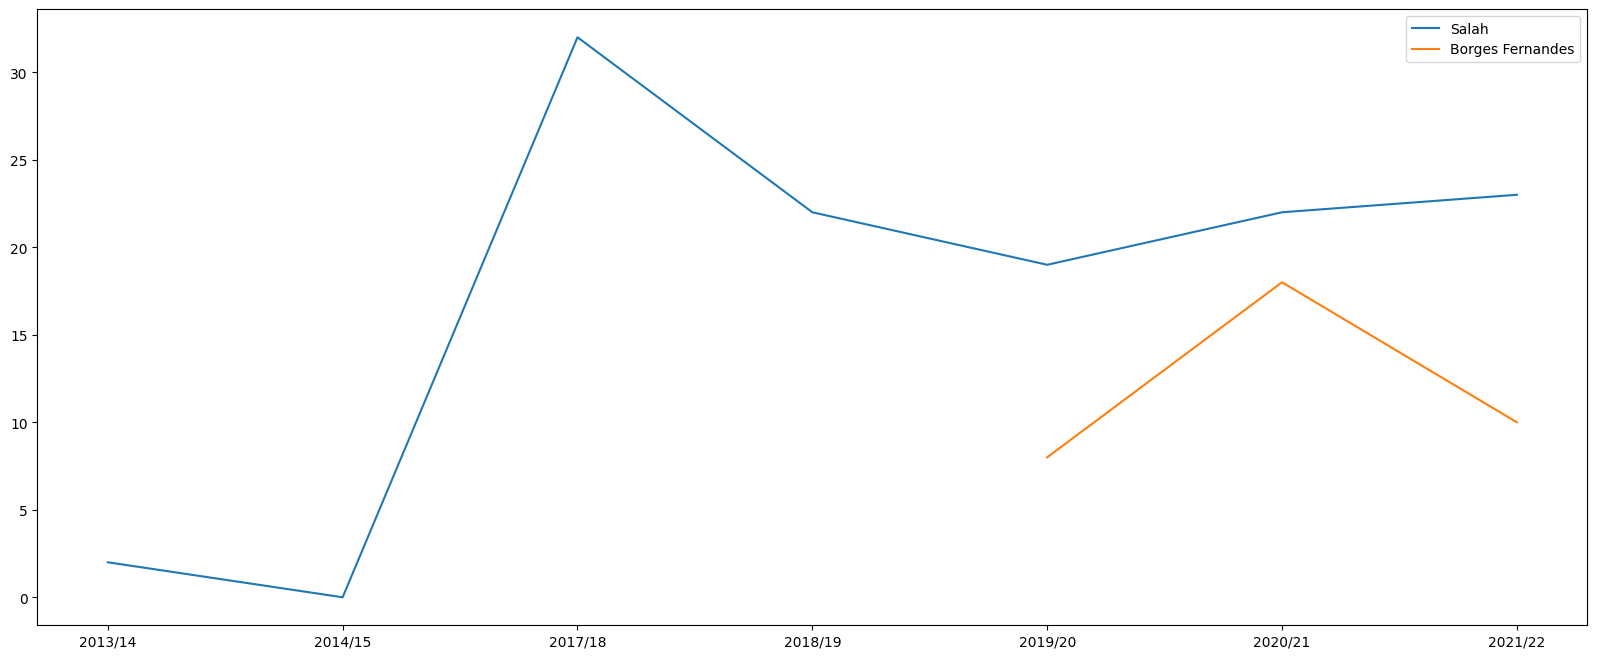

In [409]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(players.loc['Salah'])
ax.plot(players.loc['Borges Fernandes'])
ax.legend(['Salah', 'Borges Fernandes'])

Нанесем данные для каждого из 4 игроков на отдельные графики. Для всех осей координат нормируем шкалы. Для каждого графика добавим подписи, среднее значение по забитым голам за все сезоны. Добавляем легенду и заголовок.

Text(0.5, 0.98, 'Goals scored by players per season')

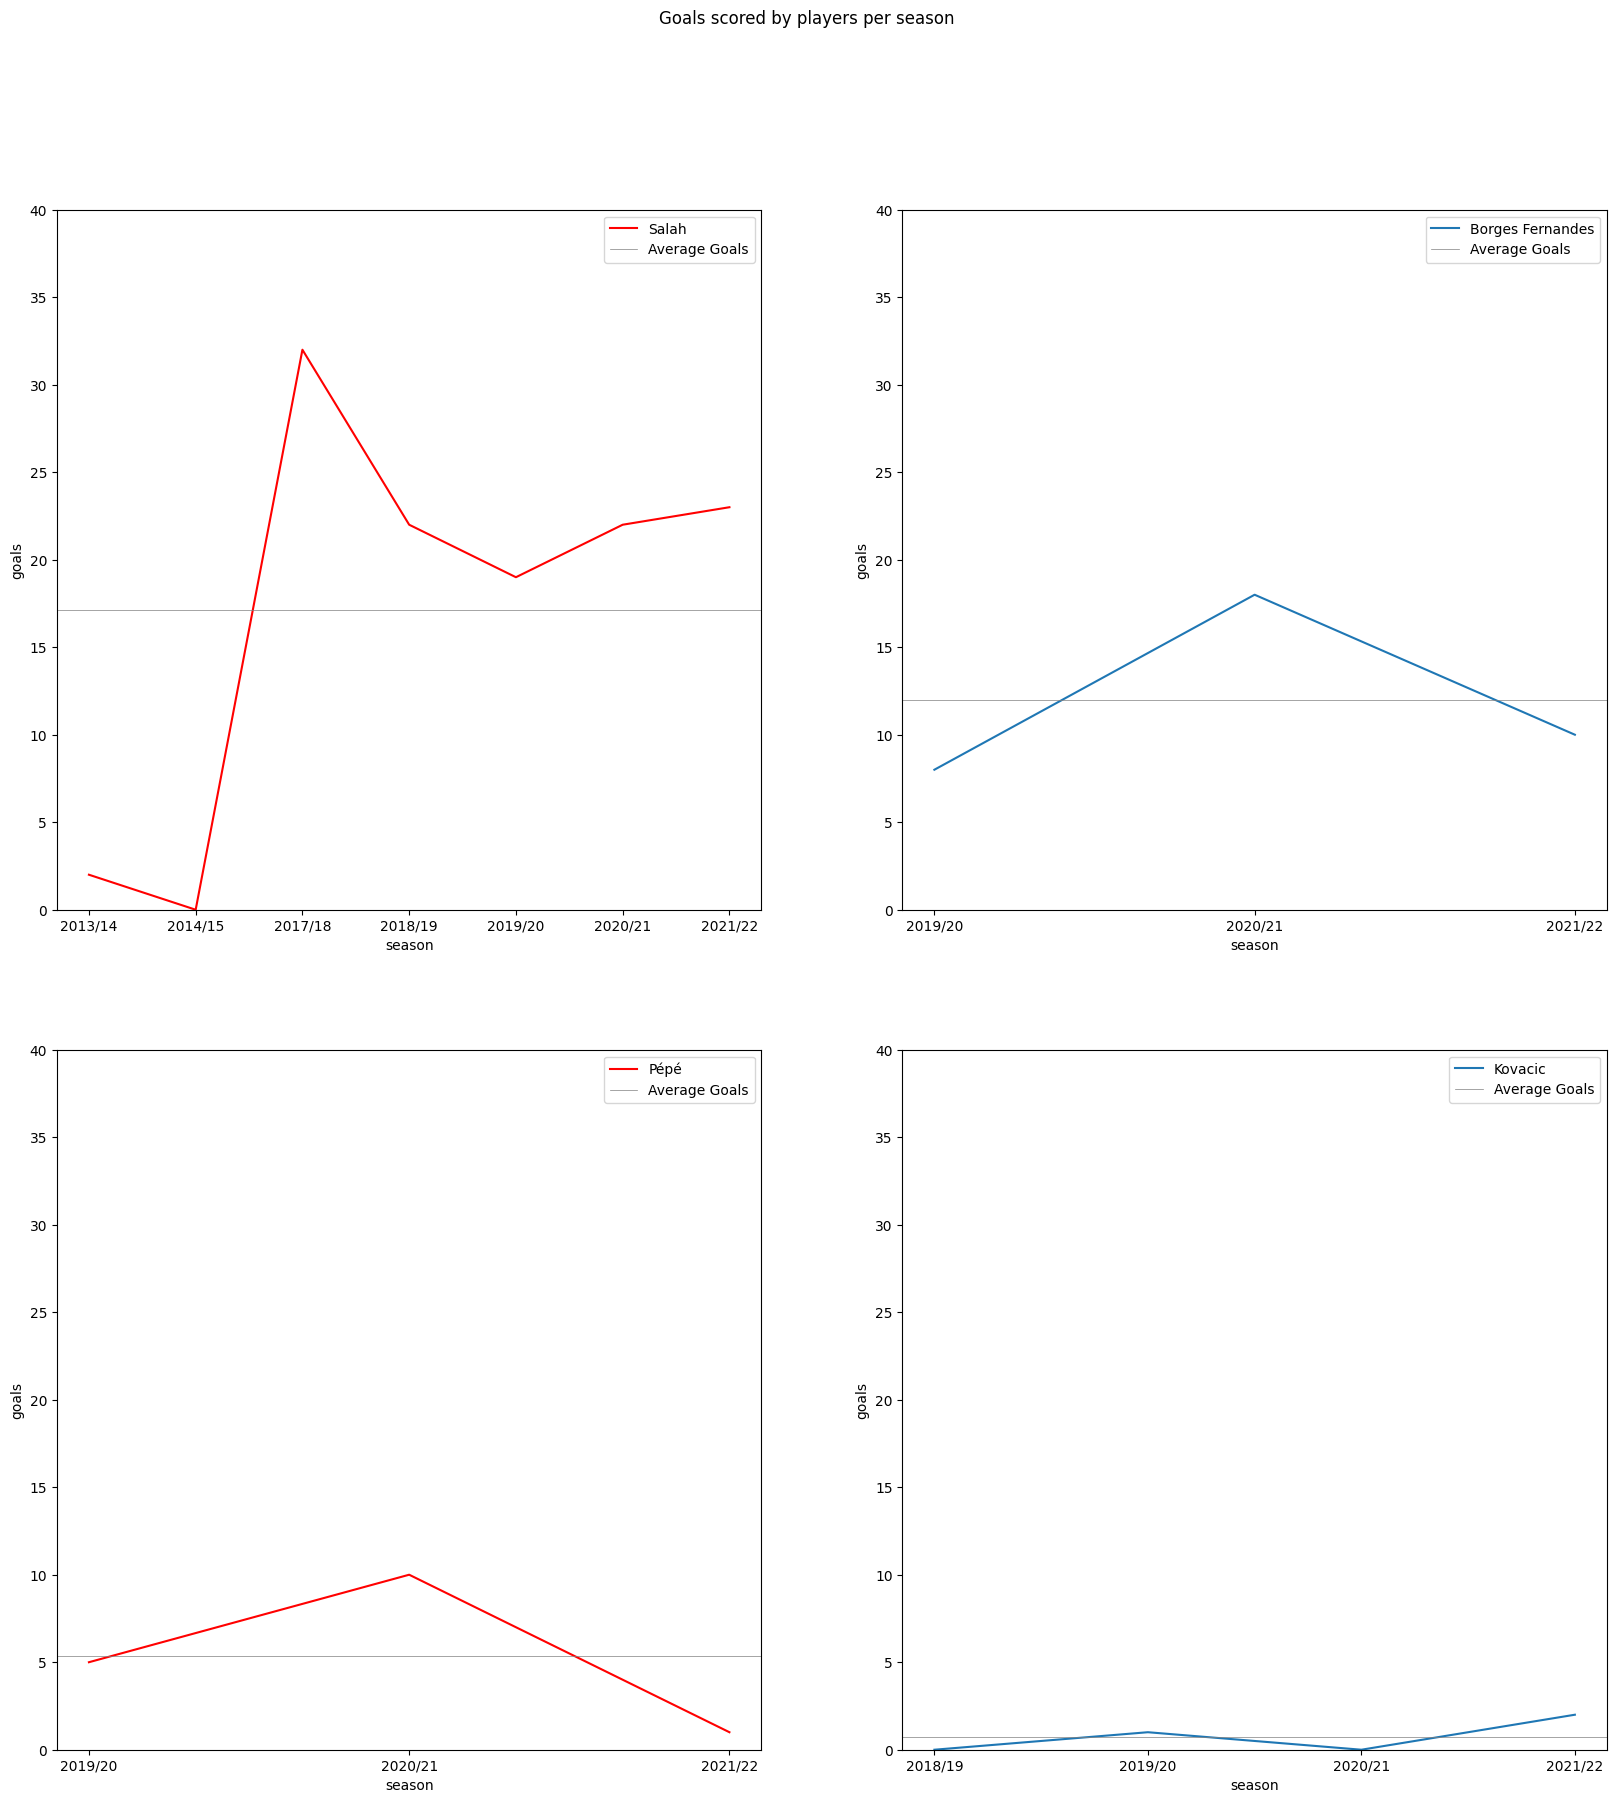

In [410]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0][0].plot(df.groupby(['second_name', 'season_name'])['goals_scored'].sum().loc['Salah'], c='red')
ax[0][1].plot(df.groupby(['second_name', 'season_name'])['goals_scored'].sum().loc['Borges Fernandes'])
ax[1][0].plot(df.groupby(['second_name', 'season_name'])['goals_scored'].sum().loc['Pépé'], c='red')
ax[1][1].plot(df.groupby(['second_name', 'season_name'])['goals_scored'].sum().loc['Kovacic'])

s_mean = df.groupby(['second_name'])['goals_scored'].mean()['Salah']

for axis in ax.ravel():
    axis.set_ylim(0, 40)
    axis.set_xlabel('season')
    axis.set_ylabel('goals')

ax[0][0].axhline(df.groupby(['second_name'])['goals_scored'].mean()['Salah'], c='gray', lw=0.5)
ax[0][1].axhline(df.groupby(['second_name'])['goals_scored'].mean()['Borges Fernandes'], c='gray', lw=0.5)
ax[1][0].axhline(df.groupby(['second_name'])['goals_scored'].mean()['Pépé'], c='gray', lw=0.5)
ax[1][1].axhline(df.groupby(['second_name'])['goals_scored'].mean()['Kovacic'], c='gray', lw=0.5)

ax[0][0].legend(['Salah', 'Average Goals'])
ax[0][1].legend(['Borges Fernandes', 'Average Goals'])
ax[1][0].legend(['Pépé', 'Average Goals'])
ax[1][1].legend(['Kovacic', 'Average Goals'])


fig.suptitle('Goals scored by players per season')

Сохраним полученный график в `png`. 